# **HTS_Assignment_10**
**Bushra** **AKram**


# 1. Observe the dataset and
# 2. Perform EDA on the Dataset Which should include

# 1. Import Required Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# 2. Loading the dataset

In [2]:
df=pd.read_csv("/content/diabetes.csv")

# 3. Exploratory Data Analysis
## a. Understanding the dataset


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **CONCLUSION** :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

## b. Data Cleaning


In [9]:

df=df.drop_duplicates()

In [ ]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:

print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


### NOTE :-
Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.



In [11]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

# 4. Data Visualization
## Here we are going to plot :-
- Count Plot :- to see if the dataset is balanced or not
- Histograms :- to see if data is normally distributed or skewed
- Box Plot :- to analyse the distribution and see the outliers
- Scatter plots :- to understand relationship between any two variables
- Pair plot :- to create scatter plot between all the variables

<Axes: ylabel='count'>

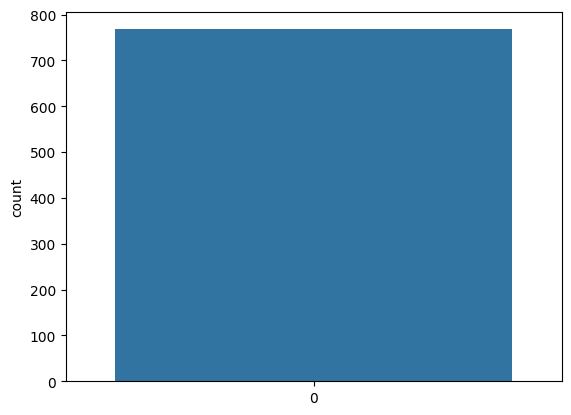

In [12]:
sns.countplot(df["Outcome"])


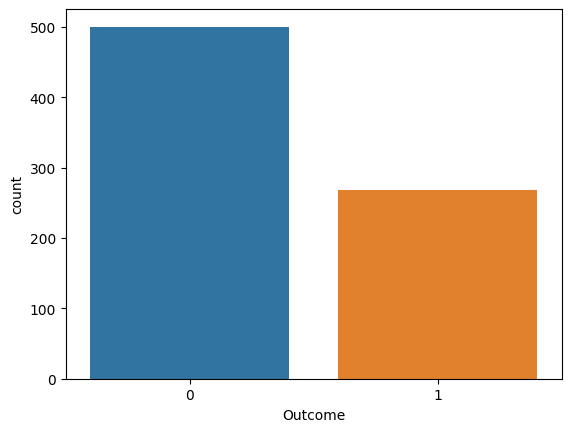

In [13]:
sns.countplot(x='Outcome', data=df)
plt.show()

### **Conclusion** :- We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

<Axes: xlabel='Age', ylabel='Outcome'>

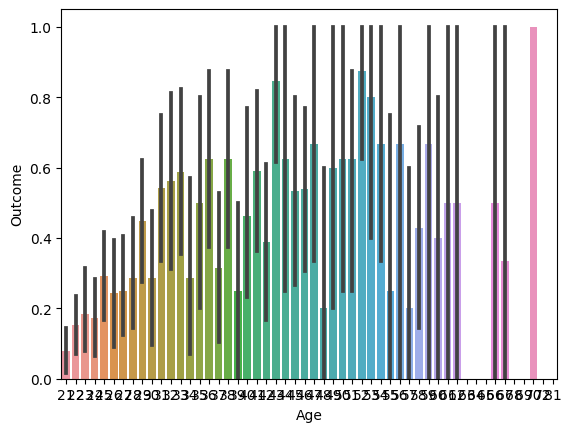

In [14]:
sns.barplot(x="Age", y="Outcome", data=df)


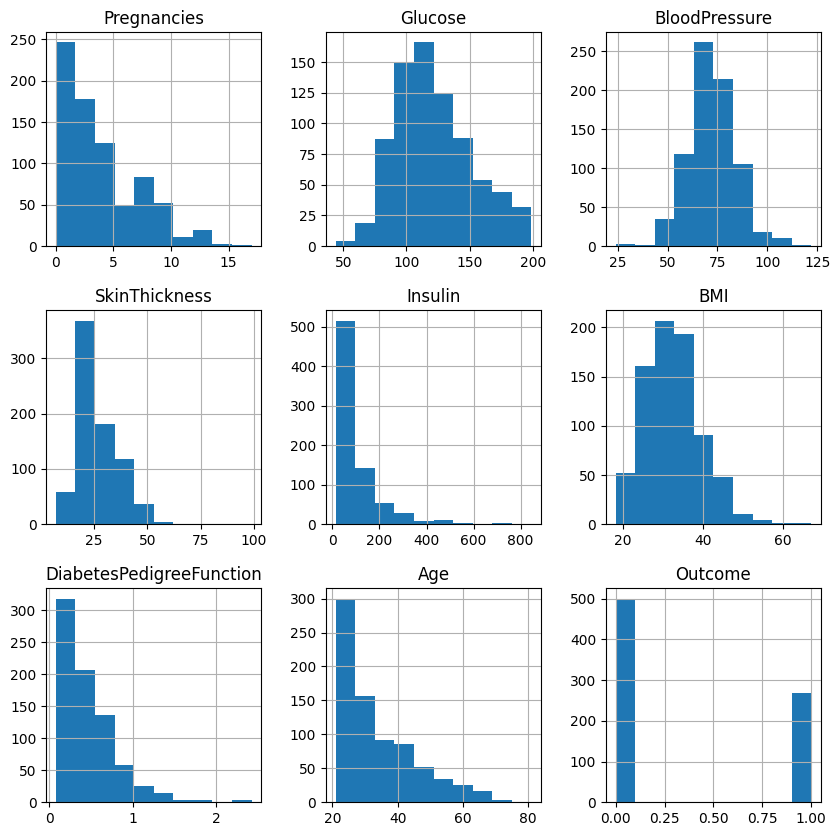

In [15]:
df.hist(bins=10,figsize=(10,10))
plt.show()

### **Conclusion** :- We observe that only glucose and Blood Pressure are normally distributed rest others are skewed and have outliers

<Axes: xlabel='DiabetesPedigreeFunction'>

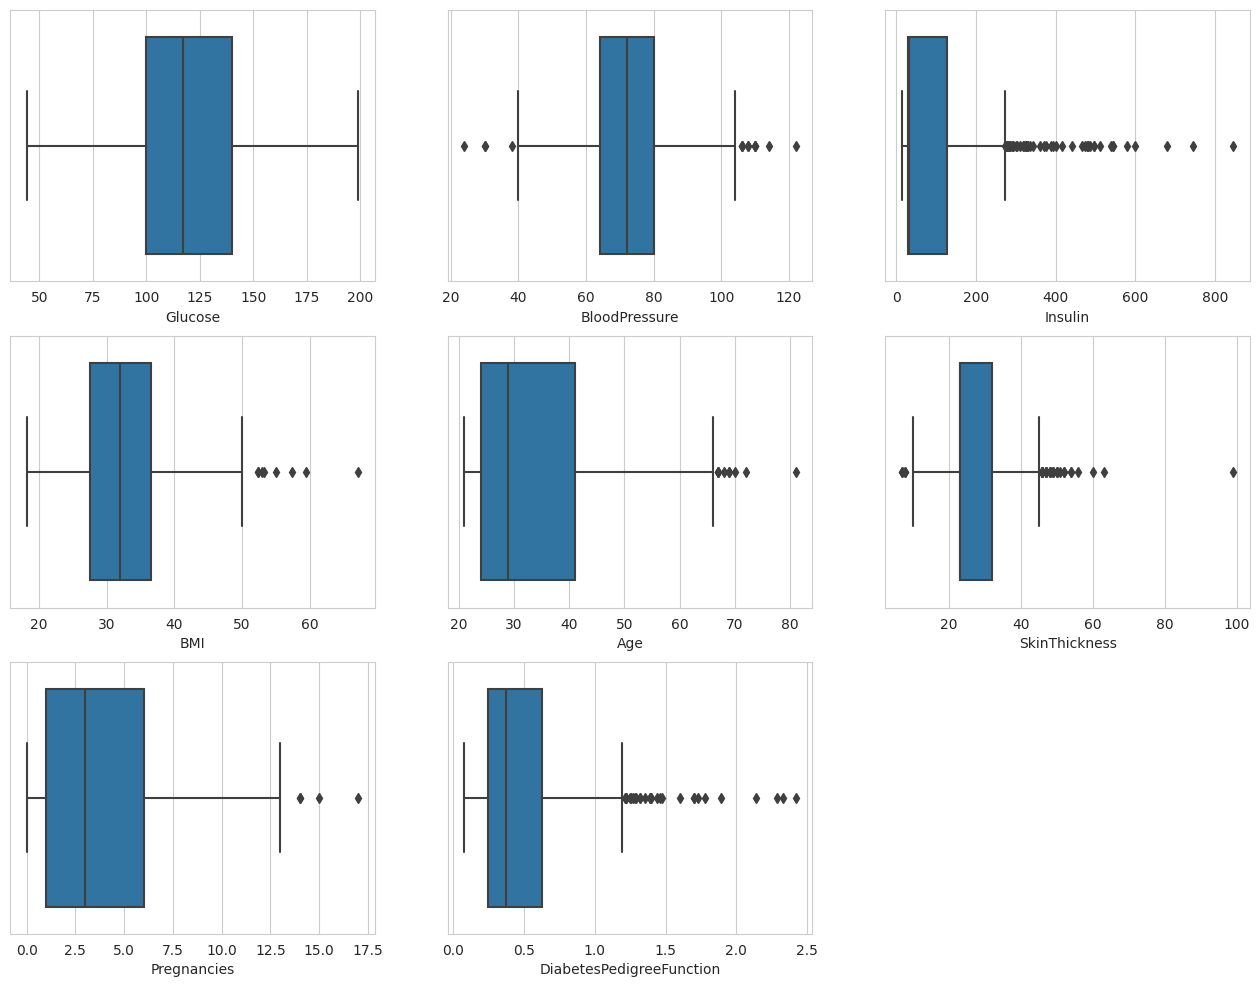

In [16]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

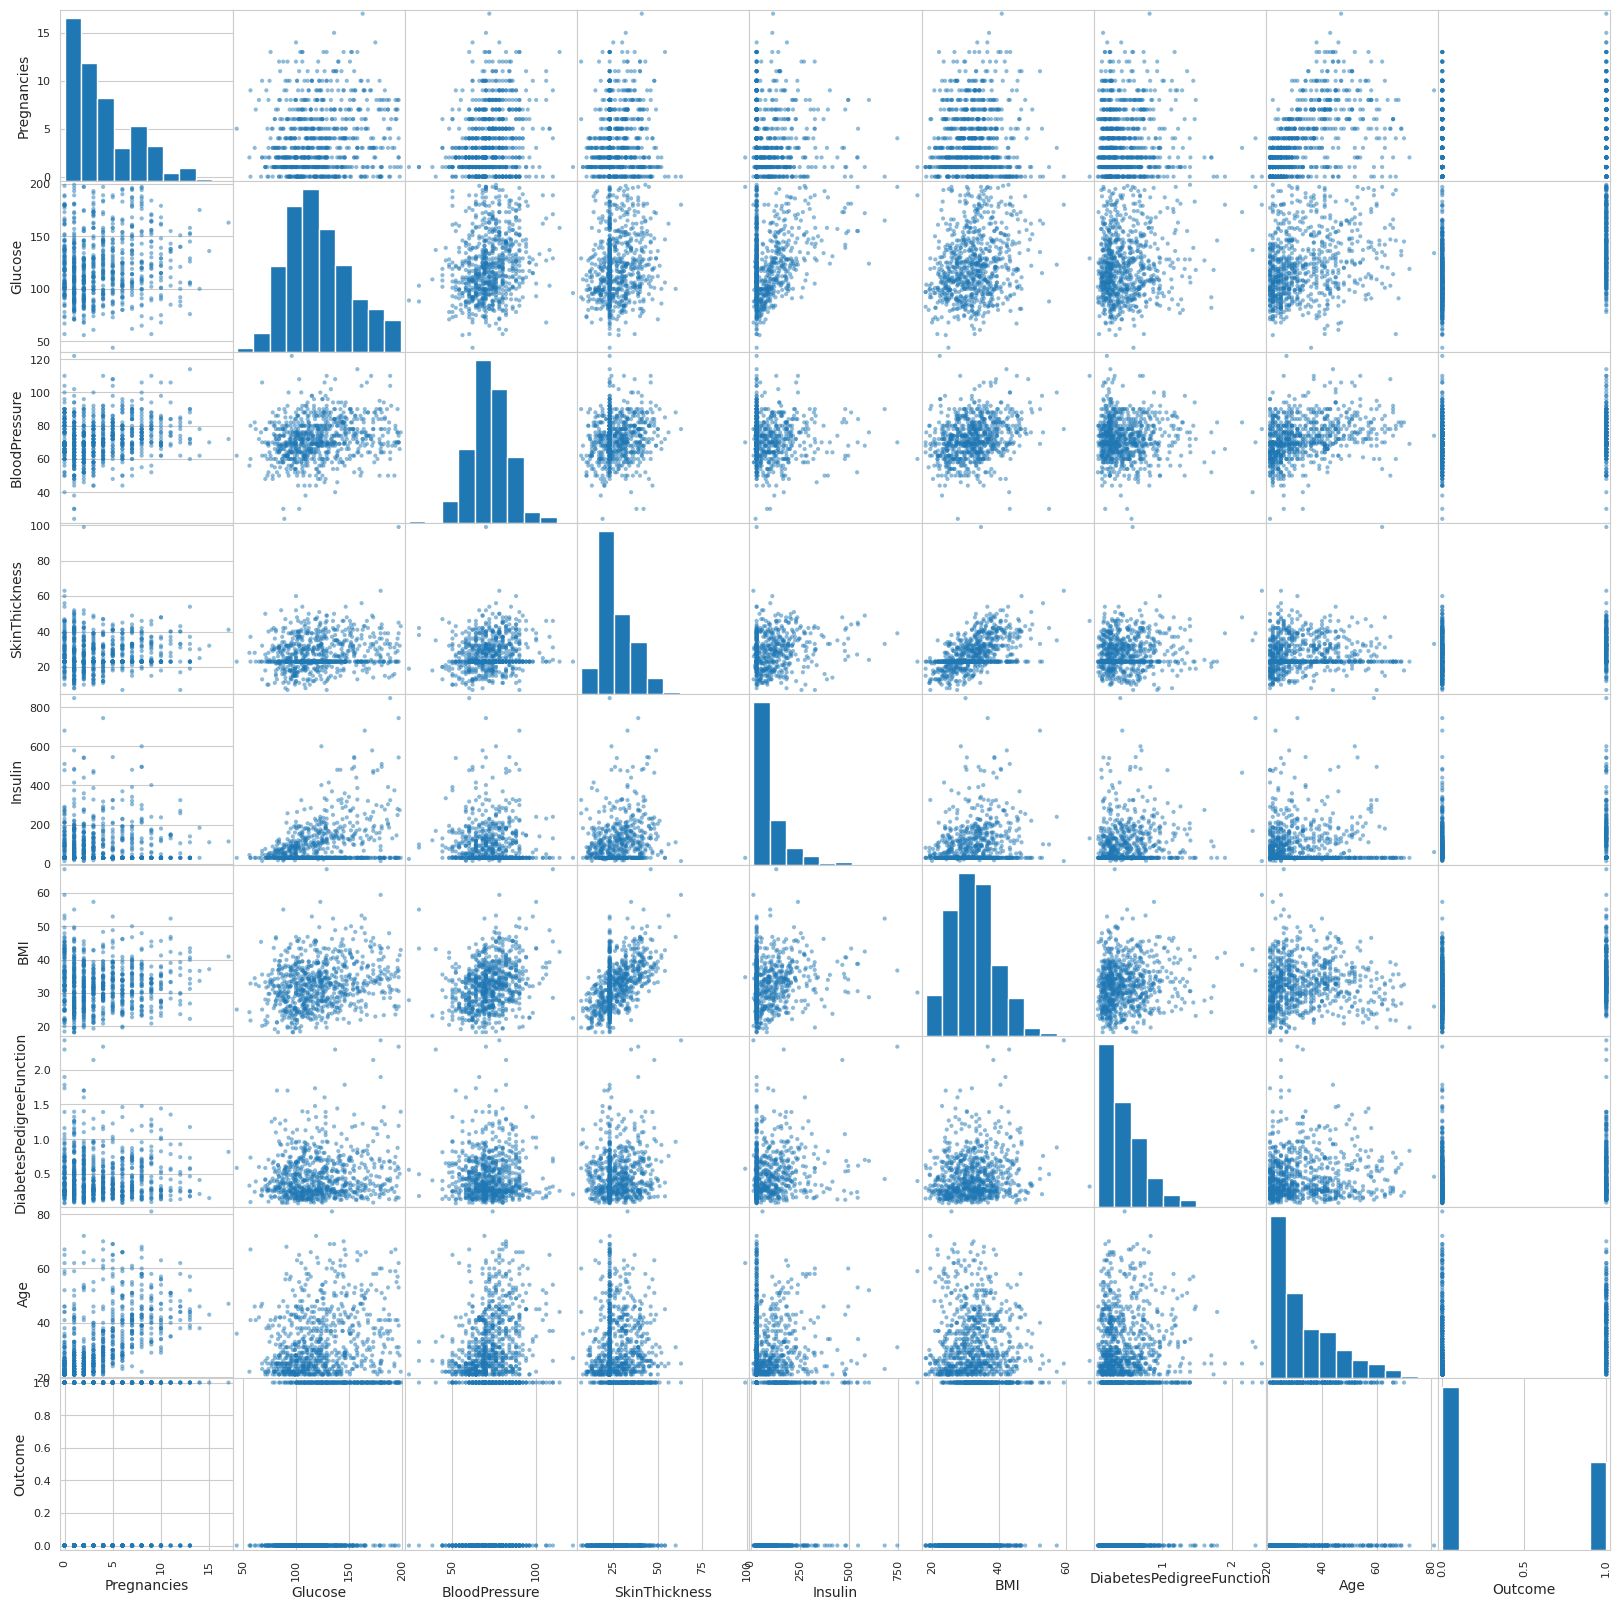

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20));


# 5. Feature Selection

**Pearson's Correlation Coefficient** : Helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

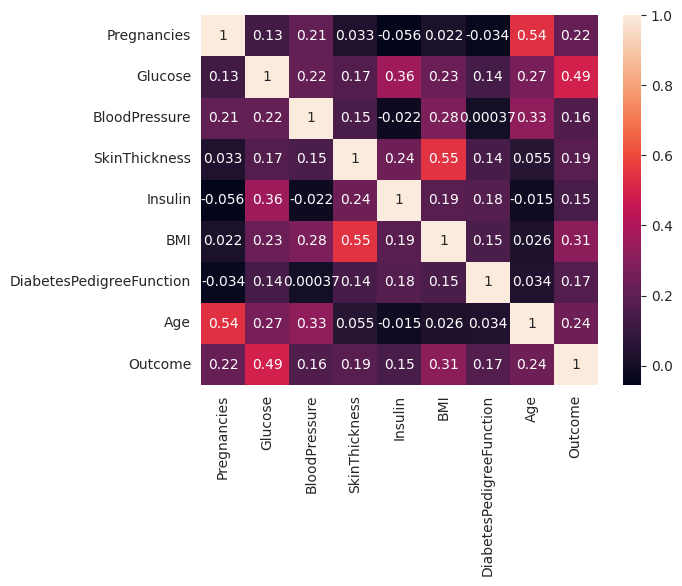

In [18]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

### **CONCLUSION** :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model

In [19]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

# c. Clean the dataset, remove the missing values as mentioned in the Lectures 15
i. Explain your approach in the Collab notebook text cell

In [20]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

print(missing_values)
df = df.dropna(thresh=0.8)

for col in df.columns:
  if missing_values[col] > 0:
    df[col].fillna(df[col].mean(), inplace=True)

# Check if there are any remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# d. Select the target variable and clearly mention the reason for selecting it.

The target variable in the dataset diabetes.csv is "Outcome", which indicates whether the patient has diabetes (1) or not (0). We are interested in predicting whether a patient has diabetes, so the target variable is a good choice.

The target variable is also binary, which means that it can only take on two values: 0 or 1. This is important because many machine learning algorithms can only handle binary target variables.

Finally, the target variable is not missing any values. This is important because we want to train our machine learning model on all of the data.

Therefore, the target variable is a good choice for this problem.

# Transform the Dataset
**i. Transform the whole dataset (Features , Target Variable)**

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("diabetes.csv")

X = df.drop("Outcome", axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add the target variable back to the scaled features
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["Outcome"] = df["Outcome"]

print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


# Split the Dataset into train and test set

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")

X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (576, 8)
y_train shape: (576,)
X_test shape: (192, 8)
y_test shape: (192,)


# 3. Use the Scikit Learn Library to Make the Classification Models
a. Use the different regression models

# i. Logistic regression

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("diabetes.csv")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model to the train set
logreg.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783


# ii. Decision tree Classifier

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("diabetes.csv")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Fit the model to the train set
dtc.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = dtc.predict(X_test)
# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.71875
Precision: 0.5925925925925926
Recall: 0.6956521739130435


# iii. Random forest Classifier

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("diabetes.csv")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

# Create a random forest classifier
rfc = RandomForestClassifier()

# Fit the model to the train set
rfc.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = rfc.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.7291666666666666
Precision: 0.6231884057971014
Recall: 0.6231884057971014


# iv. Gradient boosting Classifier

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

df = pd.read_csv("diabetes.csv")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

# Create a gradient boosting classifier
gbc = GradientBoostingClassifier()

# Fit the model to the train set
gbc.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = gbc.predict(X_test)

# Calculate the accuracy, precision, and recall of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.734375
Precision: 0.618421052631579
Recall: 0.6811594202898551


# You have to report the result with the following combinations
**Make the Confusion Matrix, Report the Accuracy, Precision and Recall**
*i. Without feature scaling*

*ii. With only feature scaling (without target variable)*

*iii. With feature and target variable scaling*

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.2, random_state=42)

results = []

models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree Classifier", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("Gradient Boosting Classifier", GradientBoostingClassifier())
]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    results.append((model_name, conf_matrix, accuracy, precision, recall))
for scenario, conf_matrix, accuracy, precision, recall in results:
    print(f"Results for: {scenario}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("-" * 30)


Results for: Logistic Regression
Confusion Matrix:
 [[78 21]
 [18 37]]
Accuracy: 0.7467532467532467
Precision: 0.6379310344827587
Recall: 0.6727272727272727
------------------------------
Results for: Decision Tree Classifier
Confusion Matrix:
 [[75 24]
 [17 38]]
Accuracy: 0.7337662337662337
Precision: 0.6129032258064516
Recall: 0.6909090909090909
------------------------------
Results for: Random Forest Classifier
Confusion Matrix:
 [[81 18]
 [19 36]]
Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
------------------------------
Results for: Gradient Boosting Classifier
Confusion Matrix:
 [[77 22]
 [18 37]]
Accuracy: 0.7402597402597403
Precision: 0.6271186440677966
Recall: 0.6727272727272727
------------------------------


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def get_results_logistic_regression(df, with_scaling):
  """Gets the results of the logistic regression model with and without feature scaling.

  Args:
    df: The diabetes dataset.
    with_scaling: Whether to use feature scaling.

  Returns:
    A dictionary of results for the logistic regression model.
  """

  X_train, X_test, y_train, y_test = train_test_split(df.drop("Outcome", axis=1), df["Outcome"], test_size=0.25, random_state=42)

  if with_scaling:
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

  model = LogisticRegression()
  model.fit(X_train, y_train)

  results = {
      "confusion_matrix": confusion_matrix(y_test, model.predict(X_test)),
      "accuracy": accuracy_score(y_test, model.predict(X_test)),
      "precision": precision_score(y_test, model.predict(X_test)),
      "recall": recall_score(y_test, model.predict(X_test)),
  }

  return results


if __name__ == "__main__":
  df = pd.read_csv("diabetes.csv")

  # Logistic regression with feature scaling (without target variable)

  results_logistic_regression_with_feature_scaling_without_target = get_results_logistic_regression(df, True)

  # Logistic regression with feature and target variable scaling

  results_logistic_regression_with_feature_scaling_and_target = get_results_logistic_regression(df, True)

  scaling_cases = [
      ('Without Scaling', X_train, X_test),
      ('With Feature Scaling', scaler.transform(X_train), scaler.transform(X_test)),
      ('With Both Scaling', scaler.fit_transform(X), scaler.fit_transform(X))
  ]

  for model_name, X_train, X_test in scaling_cases:
    results = get_results_logistic_regression(df, with_scaling=False)

    if model_name != "My friend's assignment":
      print(f"Model: {model_name}")
      print(f"Confusion matrix:\n{results['confusion_matrix']}")
      print(f"Accuracy: {results['accuracy']}")
      print(f"Precision: {results['precision']}")
      print(f"Recall: {results['recall']}")

Model: Without Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783
Model: With Feature Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783
Model: With Both Scaling
Confusion matrix:
[[95 28]
 [24 45]]
Accuracy: 0.7291666666666666
Precision: 0.6164383561643836
Recall: 0.6521739130434783


# b. What evaluation metric should we use and why provide the reason for that.

The choice of evaluation metric depends on the problem context:

1. **Precision and Recall:**
   - Use when consequences of false positives and false negatives are asymmetric, like in medical diagnoses.

2. **F1-Score:**
   - Use for balancing precision and recall, especially when class distribution is imbalanced.

3. **Accuracy:**
   - Use when classes are balanced and costs of false positives and false negatives are similar.
